# La jungle de solutions

## Définition d'un bon outils

Récupérer des mesures dans un fichier texte, chercher un algoithme qui calcule les coefficients d'un polynôme d'ordre deux qui colle avec les mesures "au mieux" (régression polynomiale) et afficher une comparaison des mesures avec ce polynôme pour ensuite envoyer le résultat sur la sortie audio demanderait beaucoup d'efforts dans un langage inadapté à ce genre de tache comme le langage ADA !

Mais cela demande juste quelques lignes dans d'autres langages (prenont ici le Matlab/Octave):

- Récupérons les datas qui sont contenues dans un fichier texte mesures.txt :


In [1]:
datas = csvread('mesures.txt') ; %CSV pour Coma Separated Values : un fichier texte avec les valeurs listées
datas
t=datas(:,1) %récupère la première colonne (le temps)
y=datas(:,2) % les mesures en deuxième colonne

datas =

    1.0000    1.0200
    2.0000    6.2300
    3.0000    5.2300
    4.0000    8.2000
    5.0000   12.3000
    6.0000   24.4000

t =

   1
   2
   3
   4
   5
   6

y =

    1.0200
    6.2300
    5.2300
    8.2000
   12.3000
   24.4000



- Regardons ce que dit la doc de Matlab/octave sur les polynomes (une courte recherche sur internet donne beaucoup de solutions pour matlab et octave ! On trouve la fonction polyfit):

In [2]:
help polyfit %donne accès à une documentation de la fonction

'polyfit' is a function from the file /usr/share/octave/4.2.2/m/polynomial/polyfit.m

 -- P = polyfit (X, Y, N)
 -- [P, S] = polyfit (X, Y, N)
 -- [P, S, MU] = polyfit (X, Y, N)
     Return the coefficients of a polynomial P(X) of degree N that
     minimizes the least-squares-error of the fit to the points '[X,
     Y]'.

     If N is a logical vector, it is used as a mask to selectively force
     the corresponding polynomial coefficients to be used or ignored.

     The polynomial coefficients are returned in a row vector.

     The optional output S is a structure containing the following
     fields:

     'R'
          Triangular factor R from the QR decomposition.

     'X'
          The Vandermonde matrix used to compute the polynomial
          coefficients.

     'C'
          The unscaled covariance matrix, formally equal to the inverse
          of X'*X, but computed in a way minimizing roundoff error
          propagation.

     'df'
          The degrees of freedom.

    

- utilisons cette fonction polyfit avec des polynomes d'ordres différents et affichons

P2 =

   0.97946  -2.91111   4.89700

P5 =

     0.18942    -3.38375    23.22208   -74.89125   112.21350   -56.33000

P8 =

 Columns 1 through 6:

   0.0078720  -0.1353994   0.8253692  -1.9565203   0.7044117   2.0957362

 Columns 7 through 9:

   1.3438621  -0.2156958  -1.6496358



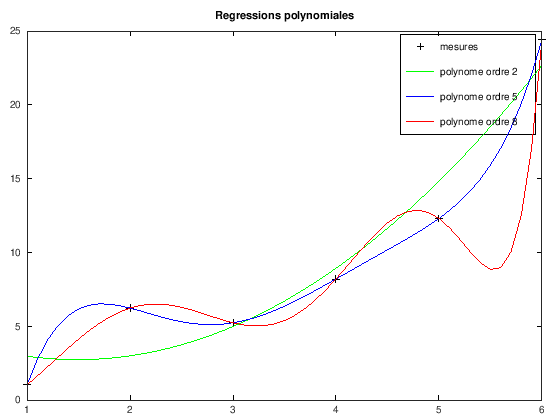

In [3]:
[P2, S] = polyfit (t, y, 2);
P2  % affiche les coefs trouvés à l'ordre 2
[P5, S] = polyfit (t, y, 5);
P5  % affiche les coefs trouvés à l'ordre 5
[P8, S] = polyfit (t, y, 8);
P8
tfine=t(1):0.1:t(end); % un vecteur temps plus fin que t : un point touts les 0.1
plot(t,y,'+k'); hold on;
plot(tfine,polyval(P2,tfine),'-g'); %affiche le polynome
plot(tfine,polyval(P5,tfine),'-b'); %affiche le polynome
plot(tfine,polyval(P8,tfine),'-r'); %affiche le polynome
legend(['mesures';'polynome ordre 2';'polynome ordre 5';'polynome ordre 8'])
title('Regressions polynomiales')

L'inginieur-e à besoin  de prototyper des solutions : résoudre, caluler, visualiser, appliquer des algorithmes puissants, expérimenter, tester,... ces besoins ont fait évoluer les premiers langages compilés impératifs vers d'autres langages. On pourrait/peut très bien utiliser les langages impératif typés comme **ADA**, **C**, **fortran** à cet effet. Mais les limitations se feront vite sentir :
* ***lisibilité, concision, documentation*** les langages typés demandent beaucoup de déclarations nécessaires pour réaliser un code sans ambiguité, sans erreurs, et optimal en terme de taille et rapidité d'exécution. Mais toutes ces informations surchargent la lecture du code et ralentisse l'écriture, la compréhension par les autres. De plus il est intéressant de documenter son code et sur sa partie "architecture" mais aussi sur sa partie scientifique qui peut demander des equations etc.
* ***souplesse, réutilisabilité*** lorsqu'une solution a été calculée, l'ingénieur doit souvent étendre ces résultats à d'autres cas. Il est alors intéressant de ne pas tout réécrire dans chaque cas, par exemple imaginez un programme qui trie des entiers, cela est embêtant si l'on doit tout réécrire juste parcequ'on veut maintenant trier des réels, ou des quaternions, ou des images etc. Un bon langage s'adaptera au changement de types des variables et permettra de regrouper facilement des librairies multiples de manière à pouvoir réutiliser.
* ***richesse de la communauté scientifique*** de même des outils mathématiques numériques doivent être utilisés : décomposition d'un signal, optimisation d'un critère pour minimiser un coût, algorithmes de tris etc. Il est intéressant de disposer de beaucoup de logiciels prêt à l'utilisation développé par une communauté scientifique utilisant ce langage.
* ***mise au point rapide*** le fait de vouloir aller vite plutôt que sûrement lors d'un prototypage fait que les erreurs sont fréquentes, d'ailleurs cela est un mauvais réflexe qui se paye souvent cher. Néanmoins le prototypage demande beaucoup d'expérimentations et de modifications ittératives "jusqu'à ce que ça marche". Pour cela les langages doivent fournir un environnement de test "débugeur", des générateurs de tests etc, et un passage à l'exécution rapide.
* ***interfaçage et visualisation*** les résultats numériques doivent être importés (enregistrement, mesures directe sur carte audio ou oscilloscope etc.) pour être traité et les résultats doivent être visualisés ou renvoyé vers le système (sortie audio, commande d'un GBF etc.). Il faut donc un ensemble de fonctions graphique et d'interfaces qui soit riche.
* ***propriété intellectuelle et passage à la solution industrielle*** une fois le prototype validé, on parle de preuve de concept. Il faut alors passer à la réalisation voire l'industrialisation du système. A ce moment il faut réfléchir à l'achat de licenses du logiciel et des librairies ou aux conditions d'utilisation des licenses gratuites et/ou libres. De plus le logiciel devra aussi s'exécuter sur autre chose qu'un PC de labo et donc à générer du code adapté, optimisé, à générer les test et vérifications voire certifications à donner pour ce code...




## Le calcul symbolique

In [1]:
clear all
pkg load symbolic

## now do some work with the symbolic pkg
syms x w a;
assume(w,'positive')
a=sym(2*pi);
f(x) = sin(a*w*x)/(a*w*x)
dfx(x) = diff (f,x)
dfw(x) = diff (f,w)
primitive(x) = simplify(int(dfx,0,x))
primitive(0)

OctSymPy v2.6.0: this is free software without warranty, see source.
Initializing communication with SymPy using a popen2() pipe.
Some output from the Python subprocess (pid 31109) might appear next.
Python 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0] :: Anaconda, Inc. on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> >>> 
OctSymPy: Communication established.  SymPy v1.3.
    double_to_sym_heuristic at line 50 column 7
    sym at line 373 column 13
f(x) = (symfun)

  sin(2⋅π⋅w⋅x)
  ────────────
    2⋅π⋅w⋅x   

dfx(x) = (symfun)

  cos(2⋅π⋅w⋅x)   sin(2⋅π⋅w⋅x)
  ──────────── - ────────────
       x                  2  
                   2⋅π⋅w⋅x   

dfw(x) = (symfun)

  cos(2⋅π⋅w⋅x)   sin(2⋅π⋅w⋅x)
  ──────────── - ────────────
       w                2    
                   2⋅π⋅w ⋅x  

primitive(x) = (symfun)

       sin(2⋅π⋅w⋅x)
  -1 + ────────────
         2⋅π⋅w⋅x   

ans = (sym) nan


# Quelques bons outils

Les candidats du moment sont :

| Logiciel | License        |Install  Native         | Utilisation en ligne  | Utilisation en Notebook Jupyter  | Calcul Symbolique |
|----------|----------------|-----------------------|-----------|-------------------|------------------------------------|
|  Matlab  | Super payant   | IDE Windows/linux/Mac | Non       | Non               |   Oui avec symbolic toolbox (500€) |
|  Octave  | gratuit, libre | IDE Windows/linux/Mac | install de octave_kernel https://octave-online.net |  https://github.com/Calysto/octave_kernel#installation  |  avec symbolic package (Simpy) |
|  Python  | gratuit, libre | IDE Windows/linux/Mac | https://repl.it/languages/python3 par exemple| natif avec ypython kernel               |  oui (Simpy) |




## Le choix pour cette année et pour les 2IMACS

Cette année nous utiliseront le langage octave dans une syntaxe entièrement compatible avec matlab. Cela permet de pouvoir travailler chez soit gratuitement (avec octave) et de plus vous prépare à l'utilisation de Matlab dans les années suivantes car ce logiciel est encore très prisé dans le domaine de l'électronique et de l'informatique.

L'IDE chosie sera l'IDE native d'octave car elle elle nécessite aucune installation et ressemble à celle de Matlab.
Conjointement nous utiliseront des notebooks Jupyter (qui permettent de mélanger texte d'explication et code à exécuter) qui interprèteront du code en langage octave grace au noyau kernel_octave. 

Pour copier l'installation de l'INSA il faudrait donc :
- installer la distribution de python nommée anaconda
- installer avec conda (l'installateur de paquets de anaconda) jupyter
- installer octave 
- installer avec conda octave_kernel
- configurer le notebook jupyter pour accepter les extensions latex